In the following notebook, we will be analyzing police use of force data in San Francisco. Raw data can be found [here](https://www.muckrock.com/foi/san-francisco-141/police-use-of-force-data-san-francisco-police-department-93028/#comms)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [3]:
#Read in data
%cd /home/kishen/Documents/SFBrigade/datasci-police-budget/data/raw_data
subject= pd.read_csv('UseOfForce - Subject.csv', parse_dates=['UOF DATE'])
forceType= pd.read_csv('UseOfForce - Force Type.csv',parse_dates=['UOF DATE'])
incident= pd.read_csv('UseOfForce - Incident.csv', parse_dates=['UOF DATE'])


[Errno 2] No such file or directory: '/home/kishen/Documents/SFBrigade/datasci-police-budget/data/raw_data'
/Users/justingoss/Desktop/datasci-police-budget/sanfranciscodataset


FileNotFoundError: [Errno 2] No such file or directory: 'UseOfForce - Force Type.csv'

## Incident Analysis

In [3]:
#Preview incident data
display(incident.shape)
incident.head()

(6250, 7)

,INCIDENT NUMBER,REPORT NUMBER,UOF DATE,INCIDENT TIME,LOCATION,ADDRESS,DISTRICT
0,UOF-2015-0034,150000102,2015-01-01,NaN,NaN,NaN,Central
1,UOF-2015-0003,150003128,2015-01-02,NaN,NaN,NaN,Southern
2,UOF-2015-0010,150003071,2015-01-02,NaN,NaN,NaN,Bayview
3,UOF-2015-0004,150004916,2015-01-03,NaN,NaN,NaN,Southern
4,UOF-2015-0005,150008112,2015-01-03,NaN,NaN,NaN,Southern


Text(0, 0.5, 'Count')

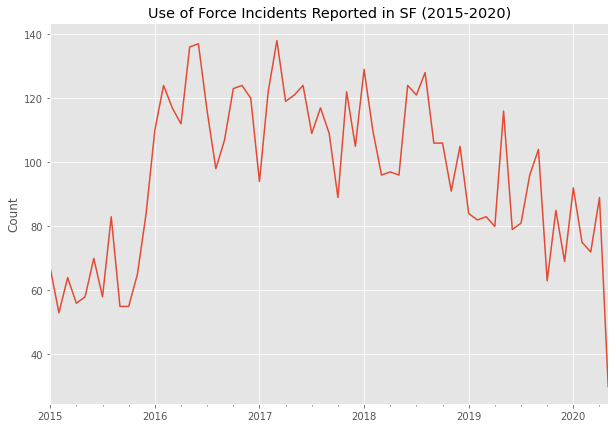

In [4]:
#Extract month/year data from UOF DATE
incident.loc[:,'monthYear']= incident['UOF DATE'].dt.to_period('M')

#Plot incidents counts by monthYear
incidentCounts= incident.groupby('monthYear')['INCIDENT NUMBER'].count().reset_index()
incidentCounts.columns= ['monthYear','incidentsCount']

incidentCounts.plot(x= 'monthYear', y= 'incidentsCount',
                   figsize= (10,7), legend= False)

plt.title('Use of Force Incidents Reported in SF (2015-2020)')
plt.xlabel('')
plt.ylabel('Count')


## Subject Analysis

In [4]:
#Preview subject data
display(subject.shape)
subject.head()

(7074, 12)

,INCIDENT NUMBER,REPORT NUMBER,UOF DATE,SUBJECT NUMBER,SUBJECT RACE,SUBJECT AGE,SUBJECT SEX,WEAPON TYPE,TYPE OF WEAPON(OTHER),COMPLAINT OF PAIN,SUBJECT INJURED,CHARGES
0,UOF-2015-0034,150000102,2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,UOF-2015-0003,150003128,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,UOF-2015-0010,150003071,2015-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UOF-2015-0004,150004916,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UOF-2015-0005,150008112,2015-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Clean-up subject data
import re
subject['SUBJECT RACE']= [re.sub(r"^\D{4}",'', str(x)) for x in subject['SUBJECT RACE']]

In [10]:
#Extract month/year data from UOF DATE
subject.loc[:,'year']= subject['UOF DATE'].dt.to_period('Y')

In [11]:
#Plot subject race counts by monthYear
raceCounts= subject.groupby(['year','SUBJECT RACE'])['REPORT NUMBER'].count().reset_index()
raceCounts.columns= ['year','race','count']

,year,race,count
0,2015,American Indian,1
1,2015,Asian or Pacific Islander,6
2,2015,Black,27
3,2015,Hispanic,17
4,2015,Unknown,1
5,2015,White,24
6,2015,nan,699
7,2016,American Indian,1
8,2016,Asian or Pacific Islander,139
9,2016,Black,786


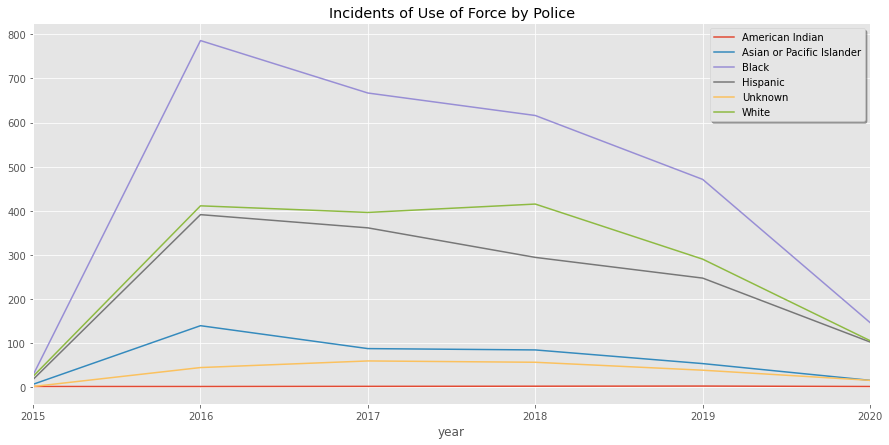

In [16]:
#Plot counts of incidents reported by race
demographics= list(raceCounts.race.unique())

f, ax= plt.subplots(figsize= (15,7))

for x, i in zip(demographics, range(len(demographics) - 1)):
    raceCounts.loc[raceCounts['race']== str(demographics[i])].plot(x= 'year', y='count', 
                                                          label = x, ax=ax)
    
ax.legend(shadow= True)
ax.set_title('Incidents of Use of Force by Police')
raceCounts.to_csv()

## Force Type Analysis

In [10]:
#Preview forceType data
display(forceType.shape)
forceType.head()

(13424, 7)

,UOF DATE,INCIDENT NUMBER,REPORT NUMBER,EMPLOYEE NUMBER,SUBJECT NUMBER,FORCE DESC,FORCE USED OTHER
0,2015-01-01,UOF-2015-0034,150000102,17169.0,NaN,UNKNOWN,NaN
1,2015-01-02,UOF-2015-0003,150003128,12294.0,NaN,UNKNOWN,NaN
2,2015-01-02,UOF-2015-0003,150003128,13423.0,NaN,UNKNOWN,NaN
3,2015-01-02,UOF-2015-0010,150003071,10782.0,NaN,UNKNOWN,NaN
4,2015-01-02,UOF-2015-0010,150003071,12281.0,NaN,UNKNOWN,NaN


In [11]:
forceType['FORCE DESC'].unique()

array(['UNKNOWN', 'Firearm', 'OC', 'Pointing of Firearms',
       'Strike by Object/Fist', 'ERIW', 'Physical Control',
       'Impact Weapon', 'Carotid', 'Other', 'Vehicle Deflection',
       'Spike Strips', 'K-9'], dtype=object)

In [12]:
#Merge force type with racial demographics data
merge= forceType.merge(subject, left_on='INCIDENT NUMBER', right_on= 'INCIDENT NUMBER')
merge.head()

,UOF DATE_x,INCIDENT NUMBER,REPORT NUMBER_x,EMPLOYEE NUMBER,SUBJECT NUMBER_x,FORCE DESC,FORCE USED OTHER,REPORT NUMBER_y,UOF DATE_y,SUBJECT NUMBER_y,SUBJECT RACE,SUBJECT AGE,SUBJECT SEX,WEAPON TYPE,TYPE OF WEAPON(OTHER),COMPLAINT OF PAIN,SUBJECT INJURED,CHARGES,monthYear
0,2015-01-01,UOF-2015-0034,150000102,17169.0,NaN,UNKNOWN,NaN,150000102,2015-01-01,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01
1,2015-01-02,UOF-2015-0003,150003128,12294.0,NaN,UNKNOWN,NaN,150003128,2015-01-02,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01
2,2015-01-02,UOF-2015-0003,150003128,13423.0,NaN,UNKNOWN,NaN,150003128,2015-01-02,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01
3,2015-01-02,UOF-2015-0010,150003071,10782.0,NaN,UNKNOWN,NaN,150003071,2015-01-02,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01
4,2015-01-02,UOF-2015-0010,150003071,12281.0,NaN,UNKNOWN,NaN,150003071,2015-01-02,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-01


In [13]:
merge['WEAPON TYPE'].unique()

array([nan, 'Replica Firearm', 'Knife or Edged Weapon', 'Other',
       'Firearm', 'Firearm; Knife or Edged Weapon', 'Blunt Object',
       'Blunt Object; Knife or Edged Weapon', 'Knife',
       'Knife or Edged Weapon; Replica Firearm',
       'Knife or Edged Weapon; Other',
       'Knife or Edged Weapon; Blunt Object', 'Blunt Object; Other',
       'Firearm; Other',
       'Firearm; Replica Firearm; Knife or Edged Weapon; Blunt Object; Other'],
      dtype=object)

In [14]:
#Get counts of incidents by race and type of force used

incidentStats= merge.groupby(['SUBJECT RACE','FORCE DESC'])['INCIDENT NUMBER'].count().reset_index()
incidentStats.columns = ['subjectRace','forceUsed', 'count']

In [15]:
incidentStats= incidentStats.pivot(index= 'subjectRace', columns='forceUsed', values= 'count')
incidentStats

forceUsed,Carotid,ERIW,Firearm,Impact Weapon,K-9,OC,Other,Physical Control,Pointing of Firearms,Spike Strips,Strike by Object/Fist,UNKNOWN,Vehicle Deflection
subjectRace,,,,,,,,,,,,,
American Indian,NaN,1.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN
Asian or Pacific Islander,2.0,6.0,NaN,33.0,NaN,10.0,NaN,150.0,1045.0,2.0,60.0,1.0,NaN
Black,7.0,50.0,14.0,148.0,2.0,104.0,66.0,1113.0,6545.0,63.0,506.0,NaN,6.0
Hispanic,3.0,112.0,37.0,59.0,NaN,38.0,19.0,650.0,3243.0,NaN,285.0,NaN,NaN
Unknown,NaN,6.0,4.0,15.0,NaN,6.0,5.0,120.0,668.0,10.0,38.0,NaN,NaN
White,3.0,51.0,42.0,106.0,NaN,68.0,39.0,945.0,2720.0,1.0,335.0,3.0,4.0
nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,970.0,NaN


In [16]:
#Subset cols pertaining to firearms
firearms= incidentStats.loc[:,['Pointing of Firearms']]

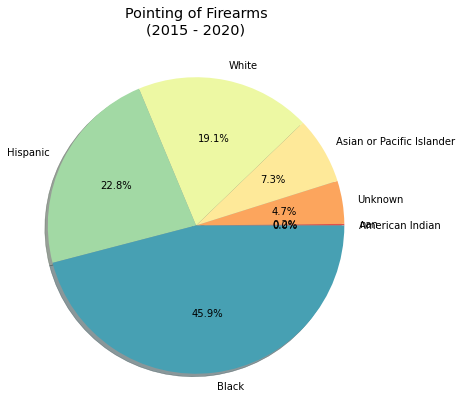

In [17]:
#Create pie chart to view proportions of pointing of firearms by racial demo
from matplotlib.gridspec import GridSpec

firearmLabels = firearms['Pointing of Firearms'].sort_values().index 
firearmCounts = firearms['Pointing of Firearms'].sort_values()

plt.figure(1, figsize= (15,15))
the_grid= GridSpec(2,2)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Pointing of Firearms\n(2015 - 2020)')
type_show_ids = plt.pie(firearmCounts, labels=firearmLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [18]:
#Subset cols pertaining to use of physical force
pForce= incidentStats.loc[:,['Physical Control', 'Impact Weapon', 'Strike by Object/Fist','Carotid']]
pForce['Total']= pForce.sum(axis=1)

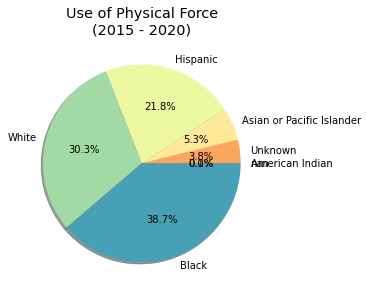

In [19]:
#Create pie chart to view proportions of use of physical force by racial demo
pForceLabels = pForce['Total'].sort_values().index 
pForceCounts = pForce['Total'].sort_values()

plt.figure(1, figsize= (20,10))
the_grid= GridSpec(2,2)

cmap = plt.get_cmap('Spectral')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

plt.subplot(the_grid[0, 1], aspect=1, title='Use of Physical Force\n(2015 - 2020)')
type_show_ids = plt.pie(pForceCounts, labels=pForceLabels, autopct='%1.1f%%', shadow=True, colors=colors)
plt.show()

In [20]:
#Prepare incidentStats to csv
incidentStats['Total UoF']=incidentStats.sum(axis=1) 

#Breakdown of Pointing of Firearms by race
incidentStats['Pointing of Firearms Proportion']= 100 * incidentStats['Pointing of Firearms']/sum(incidentStats['Pointing of Firearms'])

#Write file to csv on local machine
path= r'/home/kishen/Documents/SFBrigade/datasci-police-budget/data/processed/'
incidentStats.to_csv(path+"SF_Use_of_Force_Stats(2015-2020).csv")

incidentStats

forceUsed,Carotid,ERIW,Firearm,Impact Weapon,K-9,OC,Other,Physical Control,Pointing of Firearms,Spike Strips,Strike by Object/Fist,UNKNOWN,Vehicle Deflection,Total UoF,Pointing of Firearms Proportion
subjectRace,,,,,,,,,,,,,,,
American Indian,NaN,1.0,1.0,NaN,NaN,NaN,NaN,3.0,1.0,NaN,NaN,NaN,NaN,6.0,0.007020
Asian or Pacific Islander,2.0,6.0,NaN,33.0,NaN,10.0,NaN,150.0,1045.0,2.0,60.0,1.0,NaN,1309.0,7.335392
Black,7.0,50.0,14.0,148.0,2.0,104.0,66.0,1113.0,6545.0,63.0,506.0,NaN,6.0,8624.0,45.942721
Hispanic,3.0,112.0,37.0,59.0,NaN,38.0,19.0,650.0,3243.0,NaN,285.0,NaN,NaN,4446.0,22.764285
Unknown,NaN,6.0,4.0,15.0,NaN,6.0,5.0,120.0,668.0,10.0,38.0,NaN,NaN,872.0,4.689036
White,3.0,51.0,42.0,106.0,NaN,68.0,39.0,945.0,2720.0,1.0,335.0,3.0,4.0,4317.0,19.093079
nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN,NaN,970.0,NaN,994.0,0.168468
